In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-n0bqb0nz
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-n0bqb0nz
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28132 sha256=fa4e83f16fb5c2e0d7cdda28dc38b09a6d355b73dc5a27b51c01d2895e393a8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-66cf1j45/wheels/b0/23/e4/703c908bda656959957029fa145879aa79307b2545a2ef0271
Successfully built pyeeg


In [ ]:


print("hai")

hai


In [ ]:
 import numpy as np

import pickle as pickle
import pandas as pd
import pyeeg as pe

In [ ]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 70 #Sampling rate of 128 Hz
subjectList = ['01','02','03']
#List of subjects

In [ ]:
from sklearn.preprocessing import normalize
!gdown --id 1LoyiM9bQlrullvtoPA7X4FWhNDBGPnED
!unzip /content/data_preprocessed_python.zip -d data_preprocessed_python

Downloading...
From: https://drive.google.com/uc?id=1LoyiM9bQlrullvtoPA7X4FWhNDBGPnED
To: /content/data_preprocessed_python.zip
100% 3.30G/3.30G [00:49<00:00, 66.2MB/s]
Archive:  /content/data_preprocessed_python.zip
 extracting: data_preprocessed_python/s01.dat  
 extracting: data_preprocessed_python/s02.dat  
 extracting: data_preprocessed_python/s03.dat  
 extracting: data_preprocessed_python/s04.dat  
 extracting: data_preprocessed_python/s05.dat  
 extracting: data_preprocessed_python/s06.dat  
 extracting: data_preprocessed_python/s07.dat  
 extracting: data_preprocessed_python/s08.dat  
 extracting: data_preprocessed_python/s09.dat  
 extracting: data_preprocessed_python/s10.dat  
 extracting: data_preprocessed_python/s11.dat  
 extracting: data_preprocessed_python/s12.dat  
 extracting: data_preprocessed_python/s13.dat  
 extracting: data_preprocessed_python/s14.dat  
 extracting: data_preprocessed_python/s15.dat  
 extracting: data_preprocessed_python/s16.dat  
 extracting: da

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
    '''
    arguments:  string subject
                list channel indice
                list band
                int window size for FFT
                int step size for FFT
                int sample rate for FFT
    return:     void
    '''
    meta = []
    with open('/content/drive/MyDrive/EEG/DEAP/data_preprocessed_python/s' + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1

        for i in range (0,39):
            # loop over 0-39 trails
            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;          
            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] #meta vector for analysis
                for j in channel:
                    X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
                    Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
                    meta_data = meta_data + list(Y[0])

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save('out\s' + sub, meta, allow_pickle=True, fix_imports=True)



In [42]:
for subjects in subjectList:
    FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [43]:

data_training = []
label_training = []
data_testing = []
label_testing = []
data_validation = []
label_validation = []

for subjects in subjectList:
  

    with open('/content/out\s' + subjects + '.npy', 'rb') as file:
        sub = np.load(file,allow_pickle=True)
        for i in range (0,sub.shape[0]):
            if i % 8 == 0 or i % 8== 0:
                data_testing.append(sub[i][0])
                label_testing.append(sub[i][1])
           
            else:
                data_training.append(sub[i][0])
                label_training.append(sub[i][1])

np.save('out\data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('out\label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)


np.save('out\data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('out\label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)
"""
np.save('out\data_validation', np.array(data_validation), allow_pickle=True, fix_imports=True)
np.save('out\label_validation', np.array(label_validation), allow_pickle=True, fix_imports=True)
print("validation dataset:", np.array(data_validation).shape, np.array(label_validation).shape)
"""

training dataset: (49959, 70) (49959, 4)
testing dataset: (7137, 70) (7137, 4)


'\nnp.save(\'out\\data_validation\', np.array(data_validation), allow_pickle=True, fix_imports=True)\nnp.save(\'out\\label_validation\', np.array(label_validation), allow_pickle=True, fix_imports=True)\nprint("validation dataset:", np.array(data_validation).shape, np.array(label_validation).shape)\n'

In [44]:
data= []
label = []
for subjects in subjectList:
  

    with open('/content/out\s' + subjects + '.npy', 'rb') as file:
        sub = np.load(file,allow_pickle=True)
        for i in range (0,sub.shape[0]):
          data.append(sub[i][0])
          label.append(sub[i][1])
np.save('data', np.array(data), allow_pickle=True, fix_imports=True)
np.save('label', np.array(label), allow_pickle=True, fix_imports=True)



In [46]:
df=pd.DataFrame(data=data)
df.to_csv("data.csv",index=False)

df1=pd.DataFrame(data=label)
df1.to_csv("label.csv",index=False)

In [47]:
data1=pd.read_csv("/content/data.csv")

In [48]:
label1=pd.read_csv("/content/label.csv")
label1

,0,1,2,3
0,7.71,7.60,6.90,7.83
1,7.71,7.60,6.90,7.83
2,7.71,7.60,6.90,7.83
3,7.71,7.60,6.90,7.83
4,7.71,7.60,6.90,7.83
...,...,...,...,...
57091,4.33,6.21,5.68,4.62
57092,4.33,6.21,5.68,4.62
57093,4.33,6.21,5.68,4.62
57094,4.33,6.21,5.68,4.62


In [49]:
x=data1.values

In [50]:
y_val=label1.loc[:,'0']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_val)
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
x = np.reshape(x, (x.shape[0],1,x.shape[1]))

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45676, 1, 70)
(45676, 10)
(11420, 1, 70)
(11420, 10)


In [ ]:
import keras
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM,BatchNormalization,Activation
model = Sequential()
model.add(LSTM(512, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(256,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(LSTM(128,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(LSTM(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(10))
model.add(Activation('sigmoid'))

rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08)
model.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
#adam = keras.optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 512)         1193984   
                                                                 
 batch_normalization (BatchN  (None, None, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 256)         787456    
                                                                 
 batch_normalization_1 (Batc  (None, None, 256)        1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size=150,validation_data= (x_test, y_test))


Epoch 1/100
305/305 [==============================] - 8s 14ms/step - loss: 0.3271 - accuracy: 0.2708 - val_loss: 0.2704 - val_accuracy: 0.3012
Epoch 2/100
305/305 [==============================] - 3s 11ms/step - loss: 0.2633 - accuracy: 0.3455 - val_loss: 0.2548 - val_accuracy: 0.3658
Epoch 3/100
305/305 [==============================] - 3s 11ms/step - loss: 0.2484 - accuracy: 0.3892 - val_loss: 0.2423 - val_accuracy: 0.3970
Epoch 4/100
305/305 [==============================] - 3s 11ms/step - loss: 0.2379 - accuracy: 0.4163 - val_loss: 0.2317 - val_accuracy: 0.4269
Epoch 5/100
305/305 [==============================] - 3s 11ms/step - loss: 0.2284 - accuracy: 0.4439 - val_loss: 0.2237 - val_accuracy: 0.4518
Epoch 6/100
305/305 [==============================] - 3s 10ms/step - loss: 0.2206 - accuracy: 0.4655 - val_loss: 0.2154 - val_accuracy: 0.4776
Epoch 7/100
305/305 [==============================] - 3s 11ms/step - loss: 0.2132 - accuracy: 0.4873 - val_loss: 0.2085 - val_accuracy:

In [ ]:
 import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(10, activation='softmax'))


rmsprop =RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08)
model.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
adam = Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, None, 100)         68400     
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 99,110
Trainable params: 99,110
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# New Section

In [59]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

batch_size = 150
def dataload(X, y):
    X_tensor = torch.tensor(X).float()
    y_tensor = torch.tensor(y)
    dataset_tensor = TensorDataset(X_tensor, y_tensor)
    return dataset_tensor
    #return DataLoader(dataset_tensor, batch_size=batch_size, shuffle=True)

train_loader = DataLoader(dataload(x_train, y_train), batch_size=batch_size, shuffle=True)

valid_loader = DataLoader(dataload(x_test, y_test), batch_size=batch_size, shuffle=False)

#test_loader = DataLoader(dataload(x_test, y_test), batch_size=batch_size, shuffle=False)

# LSTM

In [60]:
#model hyperparameters
hidden_dim1 = 64
hidden_dim2= 32 
embed_dim = x_train.shape[2]
#ed2 = hidden_dim*2
output_dim = y_train.shape[1]
num_layers = 1
bidirectional = True
dropout = 0.5

#training hyperparameters
num_epochs = 100
lr=0.0001

In [65]:
import torch.nn as nn
from torch.nn import functional as F

class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
               
        self.layer1 = nn.Sequential(
            nn.Conv1d(16, 64, 4, stride=2),
            nn.ReLU(),
            nn.Dropout(p=0.1))      
        self.lstm = nn.LSTM(3839, hidden_dim1, num_layers=num_layers,
                    bidirectional=bidirectional, 
                    dropout=dropout,
                    batch_first=True)
        self.fc = nn.Linear(hidden_dim1*2, output_dim)   
        self.softmax = nn.LogSoftmax(dim=1)
    
    def attention_net(self, lstm_output, final_state):
        hidden = final_state.unsqueeze(2)  # hidden : [batch_size, n_hidden * num_directions(=2), 1(=n_layer)]
        attn_weights = torch.bmm(lstm_output, hidden).squeeze(2) # attn_weights : [batch_size, seq_len, 1]
        soft_attn_weights = F.softmax(attn_weights, 1)
        # [batch_size, n_hidden * num_directions(=2), seq_len] * [batch_size, seq_len, 1] = [batch_size, n_hidden * num_directions(=2), 1]
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)
        return context, soft_attn_weights.cpu().data.numpy() # context : [batch_size, n_hidden * num_directions(=2)]
    
    def forward(self, x):
        out0 = self.layer1(x)
        out,(hn, cn) = self.lstm(out0)
        hn = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim = 1)
        
        attn_output, attention = self.attention_net(out, hn)
        out = self.fc(attn_output)
        out = self.softmax(out)
        return out

In [66]:
#explicitly initialize weights for better learning
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, (nn.Conv2d, nn.Conv2d)):
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.kaiming_normal_(param) #<---here

In [63]:
model = LSTM().float()
#model.apply(initialize_weights)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [91]:
# Loss and optimizer
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(),lr=0.0001, eps=1e-08)

# Train Test 

In [92]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc/2

In [113]:
def cnn_acc(preds,y):
    _, predicted = torch.max(preds.data, 1)
    _, y1 = torch.max(y.data, 1)
    correct = (predicted == y1).sum()
    acc = correct / y.size(0)
    return acc

In [114]:
def train(model, loader, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train() #useful for batchnorm and dropout
    for i, (features, label) in enumerate(loader): 
        #predict
        predictions = model(features)
        #calculate loss
        loss = criterion(predictions, label)
        """l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l2_lambda * l2_norm"""
        acc = cnn_acc(predictions, label)
        
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
                
    return epoch_loss / len(loader), epoch_acc / len(loader)

In [115]:
def evaluate(model, loader, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for i, (features, label) in enumerate(loader): 


            predictions = model(features)
            
            loss = criterion(predictions, label)
            acc = cnn_acc(predictions, label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(loader), epoch_acc / len(loader)

In [116]:
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []
for epoch in range(num_epochs):

    train_loss,train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss,valid_acc = evaluate(model, valid_loader, criterion)
    
    #for plotting
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'tensor.pt')
    
    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Train Loss: 0.060 | Train Acc: 57.48%
	 Val. Loss: 0.061 |  Val. Acc: 55.49%
Epoch: 02 | Train Loss: 0.059 | Train Acc: 57.71%
	 Val. Loss: 0.061 |  Val. Acc: 56.10%
Epoch: 03 | Train Loss: 0.059 | Train Acc: 58.03%
	 Val. Loss: 0.061 |  Val. Acc: 55.08%
Epoch: 04 | Train Loss: 0.059 | Train Acc: 58.47%
	 Val. Loss: 0.060 |  Val. Acc: 56.49%
Epoch: 05 | Train Loss: 0.059 | Train Acc: 58.62%
	 Val. Loss: 0.060 |  Val. Acc: 56.97%
Epoch: 06 | Train Loss: 0.058 | Train Acc: 58.81%
	 Val. Loss: 0.060 |  Val. Acc: 57.01%
Epoch: 07 | Train Loss: 0.058 | Train Acc: 59.26%
	 Val. Loss: 0.060 |  Val. Acc: 57.48%
Epoch: 08 | Train Loss: 0.058 | Train Acc: 59.53%
	 Val. Loss: 0.059 |  Val. Acc: 57.13%
Epoch: 09 | Train Loss: 0.058 | Train Acc: 60.06%
	 Val. Loss: 0.059 |  Val. Acc: 57.81%
Epoch: 10 | Train Loss: 0.057 | Train Acc: 60.08%
	 Val. Loss: 0.059 |  Val. Acc: 57.48%
Epoch: 11 | Train Loss: 0.057 | Train Acc: 60.21%
	 Val. Loss: 0.059 |  Val. Acc: 58.54%
Epoch: 12 | Train Los

Text(0, 0.5, 'loss')

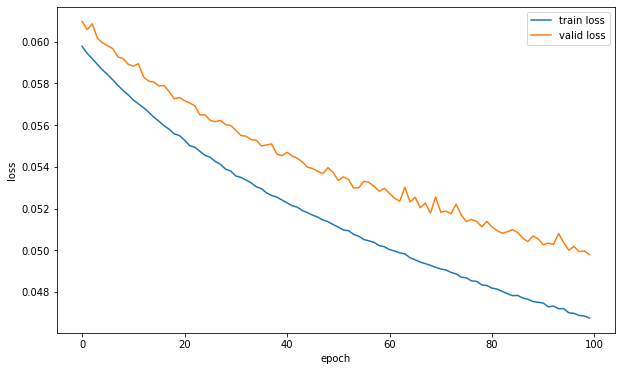

In [117]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

Text(0, 0.5, 'acc')

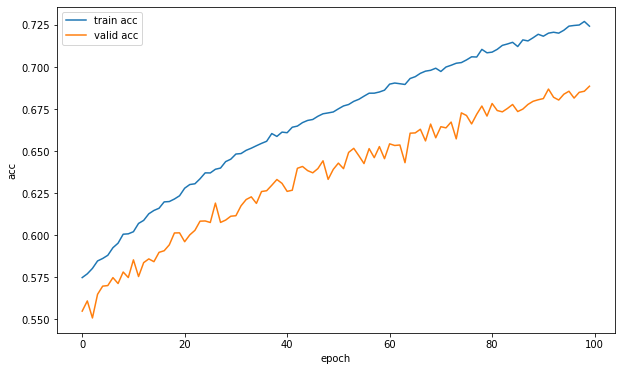

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_accs, label = 'train acc')
ax.plot(valid_accs, label = 'valid acc')
plt.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

In [119]:
model.load_state_dict(torch.load('tensor.pt'))
test_loss , test_acc = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

NameError: ignored